In [1]:
import PIL
from PIL import Image, ImageOps, ImageFilter, ImageEnhance, ImageSequence
from IPython.display import display

img_name = "20250427_194007.jpg"

In [2]:
img = Image.open(img_name)

In [ ]:
img.convert("L")

In [ ]:
img.save("cat.jpg")

In [ ]:
img.thumbnail((256,2566))
img.save("img_thumbnail.jpg", "JPEG")

In [ ]:
print(img.format, f"{img.size}x{img.mode}")

In [ ]:
box = (450, 600, 750, 900)
cat_in_box = img.crop(box)
cat_in_box

In [ ]:
region = cat_in_box.transpose(Image.Transpose.ROTATE_180)
img.paste(region, box)
img

In [ ]:
def roll(im_s: Image.Image, delta: int) -> Image.Image:
    """Roll an image sideways."""
    im = im_s.copy()
    xsize, ysize = im.size


    delta = delta % xsize
    if delta == 0:
        return im

    part1 = im.crop((0, 0, delta, ysize))
    part2 = im.crop((delta, 0, xsize, ysize))
    im.paste(part1, (xsize - delta, 0, xsize, ysize))
    im.paste(part2, (0, 0, xsize - delta, ysize))

    return im

roll(img, 700)

In [ ]:
def merge(im1: Image.Image, im2: Image.Image) -> Image.Image:
    w = im1.size[0] + im2.size[0]
    h = max(im1.size[1], im2.size[1])
    im = Image.new("RGBA", (w, h))

    im.paste(im1.copy())
    im.paste(im2.copy(), (im1.size[0], 0))

    return im

merge(img, img)

In [ ]:
r, g, b = img.split()
im = Image.merge("RGB", (g, b, r))
im

In [ ]:
out = img.resize((128, 128))
display(out)
out = img.rotate(-90)
display(out)

In [ ]:
out = img.transpose(Image.Transpose.FLIP_LEFT_RIGHT)
display(out)
out = img.transpose(Image.Transpose.FLIP_TOP_BOTTOM)
display(out)

In [ ]:
size = (256, 512)
ImageOps.contain(im, size).save("imageops_contain.webp")
ImageOps.cover(im, size).save("imageops_cover.webp")
ImageOps.fit(im, size).save("imageops_fit.webp")
ImageOps.pad(im, size, color="#f00").save("imageops_pad.webp")

In [ ]:
out = img.filter(ImageFilter.DETAIL)
display(out)
out = img.filter(ImageFilter.SMOOTH)
display(out)
out = img.filter(ImageFilter.BLUR)
display(out)
out = img.filter(ImageFilter.SHARPEN)
display(out)

In [ ]:
out = img.point(lambda i: i * 1.3)
display(out)

In [ ]:
# split the image into individual bands
source = img.split()

R, G, B = 0, 1, 2

# select regions where red is less than 100
mask = source[R].point(lambda i: i < 100 and 255)

# process the green band
out = source[G].point(lambda i: i * 0.7)

# paste the processed band back, but only where red was < 100
source[G].paste(out, None, mask)

# build a new multiband image
im = Image.merge(im.mode, source)

im

In [ ]:
enh = ImageEnhance.Contrast(img)
display(enh.enhance(1.5))
enh = ImageEnhance.Sharpness(img)
display(enh.enhance(2.0))
enh = ImageEnhance.Color(img)
display(enh.enhance(2.0))

In [ ]:
img.copy().rotate(180).save("cat_rotated.jpg")

In [ ]:
images = [img.copy(), img.copy().rotate(270), img.copy().rotate(180), img.copy().rotate(90)]
images[0].save("cat.gif", save_all=True, append_images=images[1:], duration=500, loop=0)

In [ ]:
images = [Image.open(fn) for fn in ["cat.jpg", "cat_rotated.jpg"]]
images[0].save("cat.gif", save_all=True, append_images=images[1:], duration=500, loop=0)

In [ ]:
for frame in ImageSequence.Iterator(Image.open("cat.gif")):
    display(frame)

In [ ]:
for frame in ImageSequence.Iterator(Image.open("cat.gif")):
    display(frame)

In [2]:
import cv2 as cv
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt

In [30]:
img = cv.imread(img_name)
clear_output()

In [3]:
def cv_show(img, name="cat"):
    cv.namedWindow(name, cv.WINDOW_FULLSCREEN)
    cv.imshow(name, img)
    cv.moveWindow(name, 0, 0)
    cv.waitKey(0)
    cv.destroyAllWindows()

In [5]:
cv_show(img)

In [ ]:
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
cv_show(hsv)

In [ ]:
res = cv.resize(img,None,fx=0.5, fy=0.5, interpolation = cv.INTER_CUBIC)
cv_show(res)

In [ ]:
res = cv.imread(img_name, cv.IMREAD_GRAYSCALE)
cv_show(res)

In [33]:
res = cv.imread(img_name, cv.IMREAD_GRAYSCALE)
M = np.float32([[1,0,100],[0,1,50]])
rows,cols = res.shape
dst = cv.warpAffine(res,M,(cols,rows))
cv_show(dst)

In [32]:
res = cv.imread(img_name, cv.IMREAD_GRAYSCALE)
rows,cols = res.shape
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
dst = cv.warpAffine(img,M,(cols,rows))
cv_show(dst)

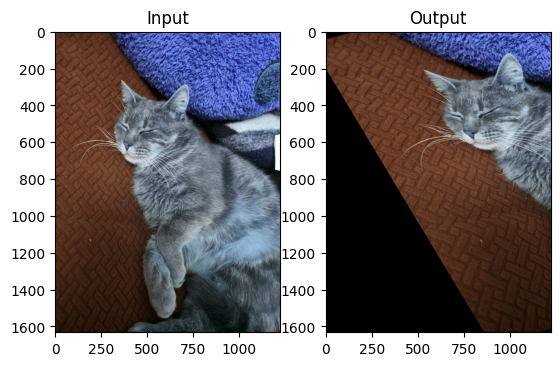

In [31]:
rows,cols,ch = img.shape
 
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
 
M = cv.getAffineTransform(pts1,pts2)
 
dst = cv.warpAffine(img,M,(cols,rows))
 
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

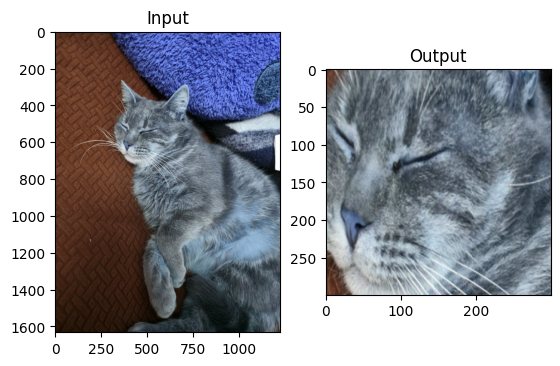

In [34]:
rows,cols,ch = img.shape
 
pts1 = np.float32([[345,438],[730,438],[345,700],[730,700]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
 
M = cv.getPerspectiveTransform(pts1,pts2)
 
dst = cv.warpPerspective(img,M,(300,300))
 
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

In [ ]:
kernel = np.ones((15,15),np.float32)/225
dst = cv.filter2D(img,-1,kernel)
 
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

cv_show(dst)

In [ ]:
blur = cv.blur(img,(10,10))
 
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

cv_show(blur)

In [ ]:
blur = cv.GaussianBlur(img,(15,15),0)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

cv_show(blur)

In [26]:
img_th = cv.imread(img_name, cv.IMREAD_GRAYSCALE)

ret,thresh1 = cv.threshold(img_th,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img_th,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img_th,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img_th,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img_th,127,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img_th, thresh1, thresh2, thresh3, thresh4, thresh5]
 
for image, title in zip(images, titles):
    cv_show(image, title)

In [27]:
img_th = cv.imread(img_name, cv.IMREAD_GRAYSCALE)
img_th = cv.medianBlur(img_th,5)
 
ret,th1 = cv.threshold(img_th,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img_th,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img_th,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
 
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img_th, th1, th2, th3]

for image, title in zip(images, titles):
    cv_show(image, title)

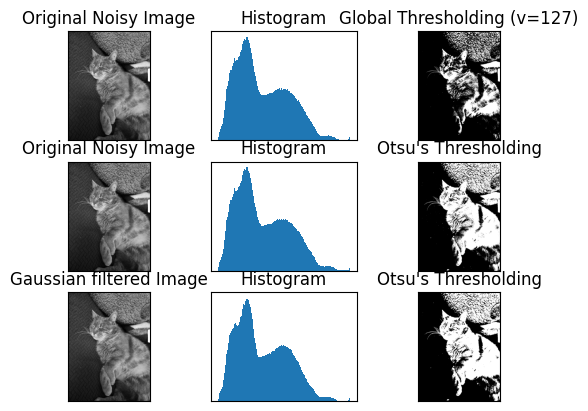

In [18]:
img_th = cv.imread(img_name, cv.IMREAD_GRAYSCALE)

ret1,th1 = cv.threshold(img_th,127,255,cv.THRESH_BINARY)
 
# Otsu's thresholding
ret2,th2 = cv.threshold(img_th,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
 
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img_th,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
 
# plot all the images and their histograms
images = [img_th, 0, th1,
          img_th, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
 
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

for i in [0,2,5,6,8]:
    cv_show(images[i], titles[i])

In [23]:
img = cv.imread(img_name)
kernel = cv.getStructuringElement(cv.MORPH_CROSS,(5,5))
erosion = cv.erode(img,kernel,iterations = 1)
dilation = cv.dilate(img,kernel,iterations = 1)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)
tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)
blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)
images = [img, erosion, dilation, closing, gradient, tophat, blackhat]
titles = ['Original Image', 'Erosion', 'Dilation', 'Closing', 'Gradient', 'Tophat', 'Blackhat']
for image, title in zip(images, titles):
    cv_show(image, title)

In [25]:
img = cv.imread(img_name)
laplacian = cv.Laplacian(img,cv.CV_64F)
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)
cv_show(img, "Original Image")
cv_show(laplacian, "Laplacian")
cv_show(sobelx, "Sobel X")
cv_show(sobely, "Sobel Y")

In [6]:
img = cv.imread(img_name)
edges = cv.Canny(img,100,200)
cv_show(edges, "Canny Edges")
edges_reversed = []
for i in edges:
    edges_reversed.append([255 - j for j in i])
cv_show(np.array(edges_reversed, dtype="uint8"), "Canny Edges Reversed")

In [ ]:
img = cv.imread(img_name)
img_low = cv.pyrDown(img)
img_low2 = cv.pyrDown(img_low)
img_high = cv.pyrUp(img_low)
img_high2 = cv.pyrUp(img)
images = [img, img_low, img_low2, img_high, img_high2]
titles = ['Original', 'Lowered', 'Lowered again', 'Lowered made highered', 'Original made highered']
for image, title in zip(images, titles):
    cv_show(image, title)

In [64]:
A = cv.imread('apple.jpg')
B = cv.imread('orange.jpg')
 
# generate Gaussian pyramid for A
G = A.copy()
gpA = [G]
for i in range(6):
    G = cv.pyrDown(G)
    gpA.append(G)
 
# generate Gaussian pyramid for B
G = B.copy()
gpB = [G]
for i in range(6):
    G = cv.pyrDown(G)
    gpB.append(G)
 
# generate Laplacian Pyramid for A
lpA = [gpA[5]]
for i in range(5,0,-1):
    GE = cv.pyrUp(gpA[i])
    L = cv.subtract(gpA[i-1],GE)
    lpA.append(L)
 
# generate Laplacian Pyramid for B
lpB = [gpB[5]]
for i in range(5,0,-1):
    GE = cv.pyrUp(gpB[i])
    L = cv.subtract(gpB[i-1],GE)
    lpB.append(L)
 
# Now add left and right halves of images in each level
LS = []
for la,lb in zip(lpA,lpB):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:cols//2], lb[:,cols//2:]))
    LS.append(ls)
 
# now reconstruct
ls_ = LS[0]
for i in range(1,6):
    ls_ = cv.pyrUp(ls_)
    ls_ = cv.add(ls_, LS[i])
 
# image with direct connecting each half
real = np.hstack((A[:,:cols//2],B[:,cols//2:]))

images = [A, B, ls_, real]
titles = ['Apple', 'Orange', 'Pyramid blended', 'Directly blended']
for image, title in zip(images, titles):
    cv_show(image, title)

In [9]:
img = cv.imread('lightning.png', cv.IMREAD_GRAYSCALE)
ret, thresh = cv.threshold(img, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv_show(cv.drawContours(img, contours, -1, (0,255,0), 3))

In [15]:
img = cv.imread('lightning.png', cv.IMREAD_GRAYSCALE)
ret,thresh = cv.threshold(img,127,255,0)
contours,hierarchy = cv.findContours(thresh, 1, 2)
 
cnt = contours[0]
M = cv.moments(cnt)
print( M )

{'m00': 3854.5, 'm10': 347890.0, 'm01': 317099.1666666666, 'm20': 32177970.916666664, 'm11': 27420245.291666664, 'm02': 30541633.75, 'm30': 3048975981.7000003, 'm21': 2427117263.366667, 'm12': 2545235496.0666666, 'm03': 3317696648.3500004, 'mu20': 778969.2043823265, 'mu11': -1199712.9627545662, 'mu02': 4454753.090849809, 'mu30': 4123083.7302765846, 'mu21': -3514849.092500791, 'mu12': -13922112.917678297, 'mu03': 72159329.27048206, 'nu20': 0.052430522856956985, 'nu11': -0.08074976207226044, 'nu02': 0.29983859751824604, 'nu30': 0.004469943455690917, 'nu21': -0.0038105402961853344, 'nu12': -0.015093328585299309, 'nu03': 0.07822982571784934}


In [16]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [17]:
area = cv.contourArea(cnt)
area

3854.5

In [18]:
perimeter = cv.arcLength(cnt,True)
perimeter

404.7766922712326

In [28]:
x,y,w,h = cv.boundingRect(cnt)
x = cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
cv_show(x, "Bounding Rect")

In [21]:
rect = cv.minAreaRect(cnt)
box = cv.boxPoints(rect)
box = np.int0(box)
cv_show(cv.drawContours(img,[box],0,(0,0,255),2))

/tmp/ipykernel_26066/1038256419.py:3: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


In [26]:
(x,y),radius = cv.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
cv_show(cv.circle(img,center,radius,(0,255,0),2))

In [25]:
rows,cols = img.shape[:2]
[vx,vy,x,y] = cv.fitLine(cnt, cv.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
cv_show(cv.line(img,(cols-1,righty),(0,lefty),(0,255,0),2))

/tmp/ipykernel_26066/4260198732.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lefty = int((-x*vy/vx) + y)
/tmp/ipykernel_26066/4260198732.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  righty = int(((cols-x)*vy/vx)+y)


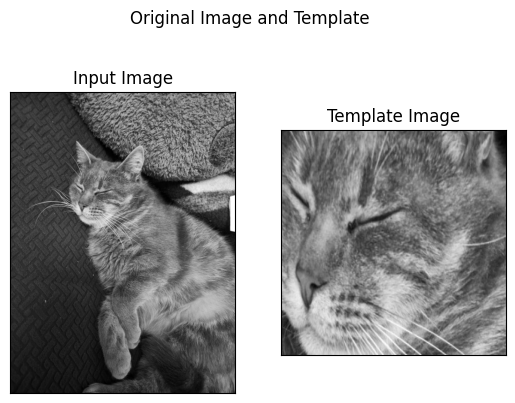

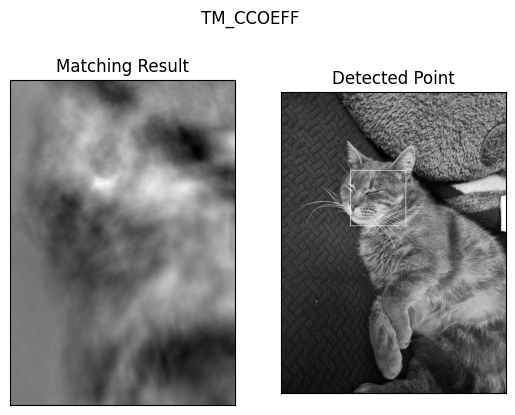

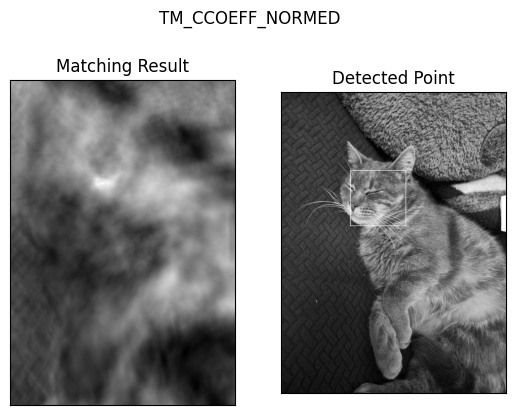

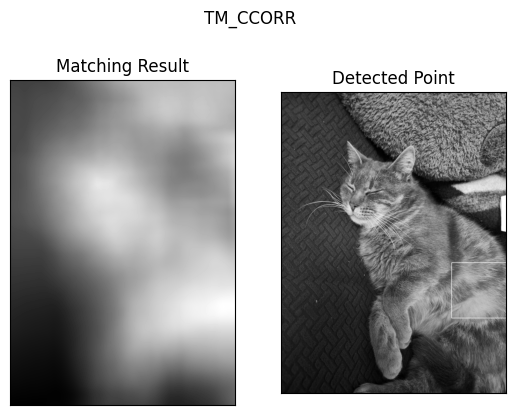

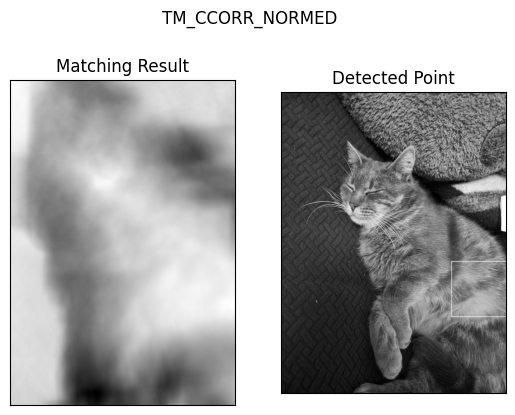

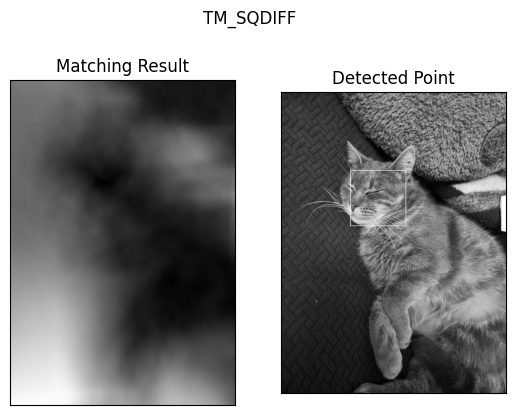

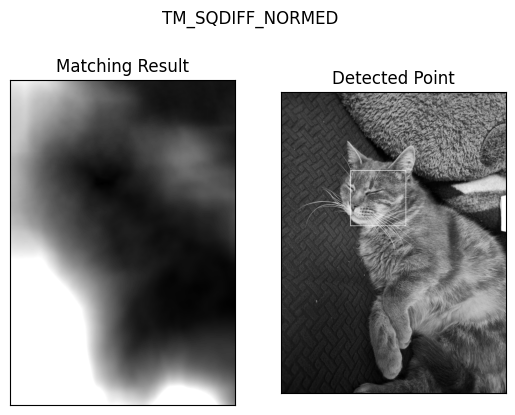

In [37]:
img = cv.imread(img_name, cv.IMREAD_GRAYSCALE)
img2 = img.copy()
template = cv.imread('template.jpg', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
 
# All the 6 methods for comparison in a list
methods = ['TM_CCOEFF', 'TM_CCOEFF_NORMED', 'TM_CCORR',
            'TM_CCORR_NORMED', 'TM_SQDIFF', 'TM_SQDIFF_NORMED']

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(template,cmap = 'gray')
plt.title('Template Image'), plt.xticks([]), plt.yticks([])
plt.suptitle('Original Image and Template')
plt.show()
 
for meth in methods:
    img = img2.copy()
    method = getattr(cv, meth)
 
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
 
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
 
    cv.rectangle(img,top_left, bottom_right, 255, 2)
 
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
 
    plt.show()

In [63]:
img = cv.imread('lightning.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,50,150,apertureSize = 3)

lines = cv.HoughLines(edges,1,np.pi/180,40)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv_show(img, "Hough Lines")

In [76]:
img = cv.imread('lightning.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,50,150,apertureSize = 3)
lines = cv.HoughLinesP(edges,1,np.pi/180,40,minLineLength=20,maxLineGap=10)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv_show(img, "Hough Lines Probabilistic")

In [5]:
img = cv.imread('circles.jpg', cv.IMREAD_GRAYSCALE)
img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)

circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

cv_show(cimg, "Hough Circles")

In [60]:
img = cv.imread('water_coins.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
cv_show(thresh, "Segmentation")

In [61]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)
cv_show(unknown, "Unknown Region")

In [64]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv.watershed(img,markers)
img[markers == -1] = [0,0,255]

cv_show(img, "Watershed Segmentation")

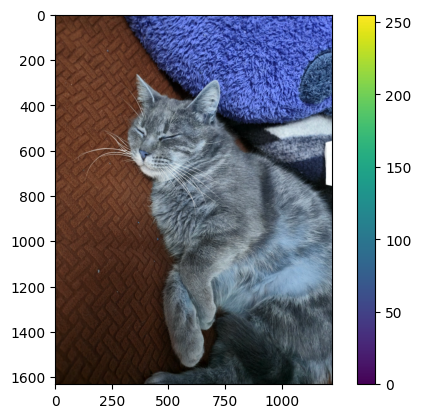

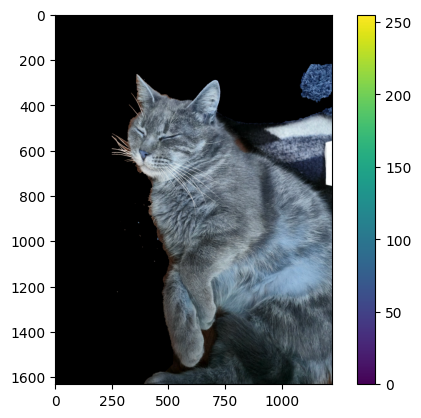

(<matplotlib.image.AxesImage at 0x7f1559792ad0>,
 None)

In [82]:
img = cv.imread(img_name)
plt.imshow(img),plt.colorbar(),plt.show()
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (250,220,974,1412)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img),plt.colorbar(),plt.show()

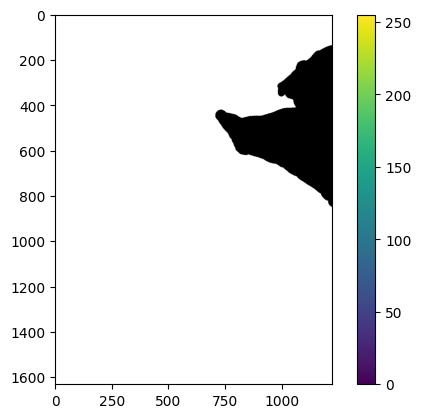

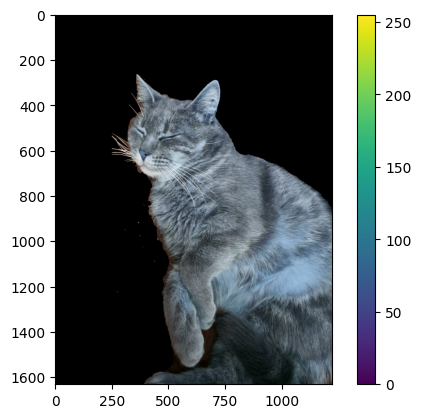

(<matplotlib.image.AxesImage at 0x7f15583710d0>,
 None)

In [85]:
# newmask is the mask image I manually labelled
newmask = cv.imread('newmask.png')
plt.imshow(newmask),plt.colorbar(),plt.show()
newmask = cv.imread('newmask.png', cv.IMREAD_GRAYSCALE)

assert newmask is not None, "file could not be read, check with os.path.exists()"

# wherever it is marked white (sure foreground), change mask=1
# wherever it is marked black (sure background), change mask=0
mask[newmask == 0] = 0
mask[newmask == 255] = 1

mask, bgdModel, fgdModel = cv.grabCut(img,mask,None,bgdModel,fgdModel,5,cv.GC_INIT_WITH_MASK)

mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

91.76


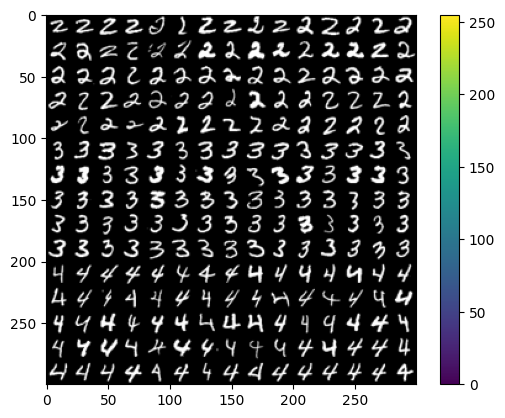

(<matplotlib.image.AxesImage at 0x7f15342ad850>,
 None)

In [104]:
import numpy as np
import cv2 as cv

img = cv.imread('digits.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

# Now we split the image to 5000 cells, each 20x20 size
cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]

# Make it into a Numpy array: its size will be (50,100,20,20)
x = np.array(cells)

# Now we prepare the training data and test data
train = x[:,:50].reshape(-1,400).astype(np.float32) # Size = (2500,400)
test = x[:,50:100].reshape(-1,400).astype(np.float32) # Size = (2500,400)

# Create labels for train and test data
k = np.arange(10)
train_labels = np.repeat(k,250)[:,np.newaxis]
test_labels = train_labels.copy()

# Initiate kNN, train it on the training data, then test it with the test data with k=1
knn = cv.ml.KNearest_create()
knn.train(train, cv.ml.ROW_SAMPLE, train_labels)
ret,result,neighbours,dist = knn.findNearest(test,k=5)

# Now we check the accuracy of classification
# For that, compare the result with test_labels and check which are wrong
matches = result==test_labels
correct = np.count_nonzero(matches)
accuracy = correct*100.0/result.size
print( accuracy )

plt.imshow(img[200:500, 200:500]),plt.colorbar(),plt.show()

In [ ]:
# --- Configuration ---
# Parameters from the tutorial image (diamondmarkers.jpg)
squareLength = 0.04      # Example size in meters (adjust if known, but ratio is key)
markerLength = 0.02      # Example size in meters (adjust if known, but ratio is key)
ratio = squareLength / markerLength

# Camera parameters (REPLACE WITH YOUR ACTUAL CALIBRATION RESULTS)
cameraMatrix = np.array([[1000.,    0.,  320.],  # fx, 0, cx
                         [   0., 1000.,  240.],  # 0, fy, cy
                         [   0.,    0.,    1.]], dtype=np.float32)
distCoeffs = np.zeros((5, 1), dtype=np.float32) # Assuming no lens distortion

# Image input
image_path = 'diamondmarkers.jpg' # The image provided in the tutorial

# --- Initialization ---
try:
    # *** Revert to original dictionary ***
    dictionary_name = cv.aruco.DICT_4X4_50
    dictionary = cv.aruco.getPredefinedDictionary(dictionary_name)
    print(f"Using dictionary: {dictionary_name}")
except AttributeError:
    print(f"Error: Dictionary '{dictionary_name}' not found.")
    sys.exit()

params = cv.aruco.DetectorParameters()
# --- Parameters with Subpixel Refinement & Perspective Adjustment ---
params.adaptiveThreshConstant = 7
# *** Re-enable Subpixel corner refinement ***
params.cornerRefinementMethod = cv.aruco.CORNER_REFINE_SUBPIX
params.cornerRefinementWinSize = 5
params.cornerRefinementMaxIterations = 30
params.cornerRefinementMinAccuracy = 0.1

# *** Adjust perspective removal slightly ***
params.perspectiveRemovePixelPerCell = 10 # Increased from default 4
params.perspectiveRemoveIgnoredMarginPerCell = 0.15 # Increased from default 0.13

# Keep other relevant parameters (optional, defaults are often okay)
# params.adaptiveThreshWinSizeMin = 3
# params.adaptiveThreshWinSizeMax = 23
# params.adaptiveThreshWinSizeStep = 10
params.minMarkerPerimeterRate = 0.02
# params.maxMarkerPerimeterRate = 4.0
# params.polygonalApproxAccuracyRate = 0.03
# params.minCornerDistanceRate = 0.05
# params.minDistanceToBorder = 3
# params.minMarkerDistanceRate = 0.05
params.markerBorderBits = 1

detector = cv.aruco.ArucoDetector(dictionary, params)

# --- Image Loading ---
frame = cv.imread(image_path)
if frame is None:
    print(f"Error: Could not load image: {image_path}")
    sys.exit()

print(f"Image '{image_path}' loaded successfully. Shape: {frame.shape}")

# --- Processing ---
frame_copy = frame.copy()
frame_rejected_vis = frame.copy() # Create a separate copy for rejected visualization
gray_frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

# 1. Detect ArUco markers (using the grayscale image)
print("\nDetecting ArUco markers...")
markerCorners, markerIds, rejectedCandidates = detector.detectMarkers(gray_frame) # Use gray_frame here

# *** Visualize Rejected Candidates ***
if rejectedCandidates is not None and len(rejectedCandidates) > 0:
    print(f"INFO: Found {len(rejectedCandidates)} rejected candidates. Visualizing them in a separate window.")
    # Pass None for ids and the color tuple as the 4th positional argument
    cv.aruco.drawDetectedMarkers(frame_rejected_vis, rejectedCandidates, None, (255, 0, 255)) # Draw rejected in magenta
    cv.imshow("Rejected Candidates", frame_rejected_vis)
else:
    print("INFO: No rejected candidates found.")


# Check if markers were found
if markerIds is not None and len(markerIds) > 0:
    print(f"SUCCESS: Detected {len(markerIds)} ArUco markers.")
    print(f"Marker IDs found: {markerIds.flatten()}")
    # Draw detected ArUco markers (on the main copy)
    cv.aruco.drawDetectedMarkers(frame_copy, markerCorners, markerIds, border_color=(0, 255, 0)) # Draw detected in green

    # --- Proceed with Diamond Detection and Pose Estimation (only if markers found) ---
    # ... (rest of the diamond detection/pose estimation code as before) ...
    # 2. Detect ChArUco Diamonds
    print(f"\nDetecting ChArUco diamonds with square/marker ratio: {ratio}...")
    try:
        diamondCorners, diamondIds = cv.aruco.detectCharucoDiamond(
            frame, markerCorners, markerIds, ratio
        )
    except cv.error as e:
         print(f"Error during detectCharucoDiamond: {e}")
         diamondIds = None

    if diamondIds is not None and len(diamondIds) > 0:
        print(f"SUCCESS: Detected {len(diamondIds)} ChArUco diamonds.")
        print(f"Diamond IDs found: {diamondIds.flatten()}")
        cv.aruco.drawDetectedDiamonds(frame_copy, diamondCorners, diamondIds)

        # 3. Estimate Pose for Diamonds
        print("\nEstimating pose for detected diamonds...")
        try:
            rvecs, tvecs, _objPoints = cv.aruco.estimatePoseSingleMarkers(
                diamondCorners, squareLength, cameraMatrix, distCoeffs
            )
            print(f"SUCCESS: Estimated pose for {len(rvecs)} diamonds.")

            # 4. Draw Pose Axes
            print("Drawing axes...")
            for i in range(len(diamondIds)):
                cv.drawFrameAxes(frame_copy, cameraMatrix, distCoeffs, rvecs[i], tvecs[i], squareLength * 0.5)
            print("SUCCESS: Drawn axes.")

        except cv.error as e:
            print(f"Error during pose estimation or drawing axes: {e}")

    else:
        print("INFO: No ChArUco diamonds detected from the found ArUco markers.")

else:
    print("INFO: No ArUco markers detected in the image.")
    # No need to proceed if no markers found


# --- Display ---
print("\nDisplaying result. Press any key to exit.")
#cv.imshow("ChArUco Diamond Detection", frame_copy) # Show main result (might be original if no markers found)
cv.waitKey(0) # Wait indefinitely until a key is pressed

# --- Cleanup ---
cv.destroyAllWindows()
print("Finished.")

Using dictionary: 0
Image 'diamondmarkers.jpg' loaded successfully. Shape: (480, 640, 3)

Detecting ArUco markers...
INFO: Found 31 rejected candidates. Visualizing them in a separate window.
INFO: No ArUco markers detected in the image.

Displaying result. Press any key to exit.
Finished.
